In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Q1
### Determine the distribution of the actual event.
### Would you be concerned about bias due to imbalance?

In [3]:
actual_counts = results['actual'].value_counts().to_dict()
print(actual_counts)

{1.0: 3000, 0.0: 2000}


In the training dataset, there is a slight imbalance in the number of examples for each class label, with a ratio of 3:2. While this does not represent a severe class imbalance, the model may still exhibit some bias towards the majority class, which is the true class in this dataset. However, the chance of such bias is relatively low due to the small degree of class imbalance.

### Q2 Create a histogram that shows the distribution of the probabilities for the True and False classes.
### Describe what you observe.

(array([ 89., 194., 346., 352., 324., 242., 208., 134.,  77.,  34.]),
 array([0.00482399, 0.07348497, 0.14214595, 0.21080693, 0.27946791,
        0.34812889, 0.41678987, 0.48545084, 0.55411182, 0.6227728 ,
        0.69143378]),
 <BarContainer object of 10 artists>)

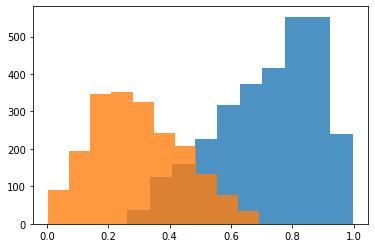

In [7]:
plt.hist(results[results['actual'] == 1.0]['prob'], alpha=0.8)
plt.hist(results[results['actual'] == 0.0]['prob'], alpha=0.8)

The histogram displays the distribution of predicted probabilities for the True and False classes, respectively. The False class probabilities are predominantly centered around the range of 0.2-0.4, with a small number of instances having probabilities close to 0 or 0.8. On the other hand, the True class probabilities are mainly centered around 0.8, with fewer instances having probabilities close to 0.2.


### Q3
### Create a simple confusion matrix. Use 0.5 as the threshold for whether an observation should be considered True or False.
### Comment on what you observe.

In [15]:
tp = np.sum((results['actual'] == 1) & (results['prob'] >= 0.5))
fp = np.sum((results['actual'] == 0) & (results['prob'] >= 0.5))
tn = np.sum((results['actual'] == 0) & (results['prob'] < 0.5))
fn = np.sum((results['actual'] == 1) & (results['prob'] < 0.5))

cm = np.array([[tn, fp], [fn, tp]])

print(cm)

[[1790  210]
 [ 377 2623]]


The number of true positives and true negatives are higher than false positives and false negatives in the model's performance, indicating that the model is performing significantly well.

### Q4
### Calculate the accuracy, precision, and recall without using any pre-built functions.
### Which measure would you use if this was your model and why?

##### showing precision, accuaracy, recall for positive class(1)

In [10]:
true_positives = np.sum((results['actual'] == 1) & (results['y_pred'] == 1))
false_positives = np.sum((results['actual'] == 0) & (results['y_pred'] == 1))
false_negatives = np.sum((results['actual'] == 1) & (results['y_pred'] == 0))
true_negatives = np.sum((results['actual'] == 0) & (results['y_pred'] == 0))
# we alredy did those above calculations in previous question
accuracy = (true_positives + true_negatives) / len(results)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))


Accuracy: 0.8826
Precision: 0.9259
Recall: 0.8743


I recommend using accuracy as the primary metric for evaluating the model's performance. As it is unclear which type of misclassification, false positive or false negative, has more severe consequences, it is difficult to decide whether to focus on precision or recall. Therefore, accuracy, which takes into account both true positives and true negatives, is the most appropriate measure to consider.

### Q5
### Construct a ROC curve plot.
### Comment on the fit of the model based on this chart.

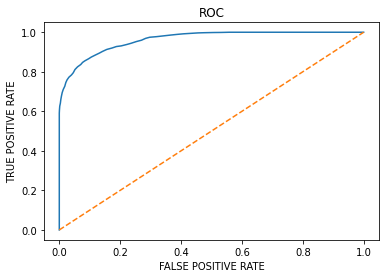

In [14]:
step_size = 0.01
thresholds = np.arange(0, 1+step_size, step_size)
true_pr = []
false_pr = []
for threshold in thresholds:
    true_p = ((results['prob'] >= threshold) & (results['actual'] == 1.0)).sum()
    false_n = ((results['prob'] < threshold) & (results['actual'] == 1.0)).sum()
    false_p = ((results['prob'] >= threshold) & (results['actual'] == 0.0)).sum()
    true_n = ((results['prob'] < threshold) & (results['actual'] == 0.0)).sum()
    true_pr.append(true_p / (true_p + false_n))
    false_pr.append(false_p / (false_p + true_n))
plt.plot(false_pr, true_pr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC')
plt.show()

Reference:
https://stackoverflow.com/questions/28806551/unexpected-output-for-numpy-arange-with-step-size-of-0-005

The plot depicts that the current model fit has achieved the best performance, as classifiers that have curves closer to the top-left corner indicate better performance. The closer the curve to the top left, the more accurate the model is. We can use this plot to select an optimal threshold depending on whether we want to increase True Positive Rate (TPR) and decrease False Positive Rate (FPR), or increase both. It is crucial to balance the tradeoff between TPR and FPR when selecting the optimal threshold.



